# Programación 201

# NBA player of the week

### Ejercicio 1

# Descripción y enunciado
El objetivo de esta actividad es la gestión y preparación de datos. La gestión de datos es una parte muy importante de cualquier proceso de minería de datos, ya que los datos se deben preparar y preprocesar antes de iniciar el proceso de extracción de conocimiento.
Esta tarea ilustra algunos de los procedimientos básicos con los que nos podemos encontrar para preparar los datos: analizar los tipos de datos, tranformar valores, detectar e eliminar outliers, hacer un muestreo, etcétera.

# Fichero de datos
El conjunto de datos con el que trabajaremos en esta actividad surge de la bases de datos disponibles en Kaggle . En concreto, los datos corresponden a los jugadores nombrados jugadores de la semana desde la temporada 1984-1985 hasta la temporada 2017-2018. Estos datos nos ofrecen múltiples posibilidades para consolidar los conocimientos y competencias de manipulación de datos, preprocesado y análisis descriptivo. El fichero `NBA_player_of_the_week.csv` se encuentra adjunto.


# Ingesta de datos
Actualmente el fichero se encuentra en la misma carpeta de datos RMD, está en adjunto. Se enviará nueva práctica similar con los datos de ingesta a través de scraping / API / base de datos para R y Python.


# Valoraciones
- se valorarán los trabajos por los detalles, no vale con el solo enviar un trozo de código, sino la explicación es fundamental
- explicar además los resumen de cada sección (carga, preparación, EDA, limpieza, nuevos atributos, discretización, split train-test)
- conclusiones y comparativas son los más importantes para comenzar con Data Mining.

### 1) Cargar un juego de datos 

`Librerías:`

In [1]:
import pandas as pd
import numpy as np

`Carga de datos:`

In [2]:
nba = pd.read_csv("NBA_player_of_the_week.csv")

### 2) Descripción de los datos

Describir brevemente la estructura de los datos: qué tipo de datos contiene, número de filas y columnas y nombre de las columnas. Realizar un resumen descriptivo de los datos.

In [3]:
# Tipo de datos que contiene
type(nba)

pandas.core.frame.DataFrame

In [4]:
# Observamos el tipo de dato por dimensión
nba.dtypes

Age                    int64
Conference            object
Date                  object
Draft Year             int64
Height                object
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight                object
Real_value           float64
dtype: object

In [5]:
# Número de filas:
print("- El dataframe 'NBA_player_of_the_week' contiene: {} filas".format(len(nba)))
# Nombre de columnas:
print("- Nombres de las columnas : {}".format(nba.columns.values))

- El dataframe 'NBA_player_of_the_week' contiene: 1145 filas
- Nombres de las columnas : ['Age' 'Conference' 'Date' 'Draft Year' 'Height' 'Player' 'Position'
 'Season' 'Season short' 'Seasons in league' 'Team' 'Weight' 'Real_value']


In [6]:
# Estadísticas básicas: 
nba.describe()

,Age,Draft Year,Season short,Seasons in league,Real_value
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,26.772926,1997.244541,2004.211354,5.869869,0.667686
std,3.402354,9.381369,9.426976,3.271995,0.236163
min,19.000000,1969.000000,1985.000000,0.000000,0.500000
25%,24.000000,1990.000000,1997.000000,3.000000,0.500000
50%,26.000000,1998.000000,2006.000000,6.000000,0.500000
75%,29.000000,2004.000000,2012.000000,8.000000,1.000000
max,40.000000,2016.000000,2018.000000,17.000000,1.000000


### 3) Preparación de la base de datos
#### 3.1 Asignar NA a los valores ausentes en los datos de `Conference`.

In [7]:
# Reviso los valores ausentes por Variable
nba.isna().sum()

Age                    0
Conference           384
Date                   0
Draft Year             0
Height                 0
Player                 0
Position               0
Season                 0
Season short           0
Seasons in league      0
Team                   0
Weight                 0
Real_value             0
dtype: int64

In [8]:
# Reviso los valores que componen la variable Conference
nba.Conference.value_counts(dropna = False)

NaN     384
East    381
West    380
Name: Conference, dtype: int64

In [9]:
# Al no haber valores automáticamente se generean NaN , sin embargo voy a asignar el valor NA a cada uno de ellos:
nba.Conference.fillna("Na", inplace=True)

In [10]:
# Realizamos la comprobación de que la asignación ha sido correcta
print(nba.Conference.unique())

['Na' 'East' 'West']


#### 3.2 Transformar los datos de Conference en variable categórica y mostrar la tabla de frecuencia.

In [11]:
# Transformación de los datos de `Conference`
nba["Conference"] = nba.Conference.astype("category")
# Comprobamos la transformación
nba.Conference.dtypes

CategoricalDtype(categories=['East', 'Na', 'West'], ordered=False)

In [12]:
# Tabla de frecuencia
nba.Conference.value_counts()

Na      384
East    381
West    380
Name: Conference, dtype: int64

#### 3.3 Comprobar que la variable tiene xxx valores ausentes

In [13]:
# Recordemos que los valores ausentes fueron sustituidos por "Na"
nba.groupby(['Conference'])['Conference'].count()

Conference
East    381
Na      384
West    380
Name: Conference, dtype: int64

#### 3.4 Transformar las variables Height, Player, Position, Season, Team y Weight en variables categóricas.

In [14]:
nba["Height"] = nba.Height.astype("category")
nba["Player"] = nba.Player.astype("category")
nba["Position"] = nba.Position.astype("category")
nba["Season"] = nba.Season.astype("category")
nba["Team"] = nba.Team.astype("category")
nba["Weight"] = nba.Weight.astype("category")

#### 3.5 Comprobar que estas variables no tienen valores perdidos.

In [15]:
# Comprobamos que las variables transformadas no contengan valores perdidos tras realizar la suma de los elementos
nba[["Height", "Player", "Position", "Season", "Team", "Weight"]].isna().sum()

Height      0
Player      0
Position    0
Season      0
Team        0
Weight      0
dtype: int64

#### 3.6 Calcular el número de anyos que pasan entre que salio el jugador elegido en el draft y la temporada en la que fue jugador de la semana. Denomina la variable tiempo

In [16]:
nba["Tiempo"] = nba["Season short"] - nba["Draft Year"]

In [17]:
# Traemos las variables involucradas y comprobamos
nba[["Season short", "Draft Year", "Tiempo"]].head(10)

,Season short,Draft Year,Tiempo
0,1985,1978,7
1,1985,1982,3
2,1985,1979,6
3,1985,1969,16
4,1985,1978,7
5,1985,1980,5
6,1985,1982,3
7,1985,1981,4
8,1985,1979,6
9,1985,1982,3


####  3.7 ¿Cual es el número de años que más veces se repite entre que salen elegidos en el draft y se proclaman mejores jugadores? (moda de la variable tiempo)

In [18]:
# Podemos observar que el año que más se repite es:
nba.Tiempo.mode()

0    7
dtype: int64

#### 3.8 La altura de los jugadores está expresada en pies (aquellas con guión) y cm. Convertir la altura expresada en pies a centimetros (https://www.piesametros.info/](https://www.piesametros.info/). Posteriormente, eliminar el texto “cm” de los datos de tipo altura y convertir la variable en numérica. Calcular media, desviación típica y boxplot.

In [19]:
# Realizamos la conversión de la variable:
nba.Height = nba.Height.astype(str)

#Iteramos:
for i in range(len(nba['Height'])):
    # Si encuentra un '-' entonces vamos a crear una variable en la cual almacenaremos la separación pies y pulgadas
    if "-" in nba['Height'][i]:
        Variable = nba['Height'][i].split("-")
        # Aplicaremos la conversión de pies y pulgadas a centímetros y redondeamos el resultado y
        # realizaremos la correspondiente asignacion
        nba.loc[i, 'Height'] = round(int(Variable[0]) * 30.48 + (int(Variable[1]) * 2.54),0)
    elif "cm" in nba['Height'][i]:
        #En donde encontremos 'cm' haremos un reemplazo
        nba.loc[i, 'Height'] = nba['Height'][i].replace("cm", "")
# Para poder realizar operaciones luego de haber depurado la data convertimos la variable a numerica     
nba.Height = nba.Height.astype('float')


In [20]:
# Realizamos el cálculo de la media y la desviación típica
nba.Height.agg(['mean','std'])

mean    200.992140
std       9.468337
Name: Height, dtype: float64

<AxesSubplot:>

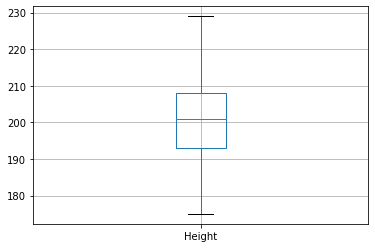

In [21]:
# Boxplot
nba.boxplot(column=['Height'])

#### 3.9 El peso de los jugadores está expresada en libras y kg. Convertir el peso expresado en kgs en libras [https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm](https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm). Convertir la variable en numérica.Calcular media, desviación típica y boxplot.

In [22]:
# Realizamos la conversión de la variable:
nba.Weight = nba.Weight.astype(str)
# 1) Remover 'Kg'
# 2) convertir los pesos expresados en Kgs a libras
# Iteramos
for i in range(len(nba['Weight'])):
    # 1 Kg = 2.205 Libras
    # Al momento de encontrar 'kg' realizaremos un reemplazo y procederemos a convertir los kg en libras
    if 'kg' in nba['Weight'][i]:
        nba.loc[i,'Weight'] = int(nba['Weight'][i].replace('kg','')) *2.20    
#Los valores que no estén acompañados con el str 'kg' se encuentran expresados en libras por lo que no haremos ninguna conversión  

In [23]:
# Para poder realizar operaciones luego de haber depurado la data convertimos la variable a numerica     
nba.Weight = nba.Weight.astype('float')

In [24]:
# Realizamos el cálculo de la media y la desviación típica
nba.Weight.agg(['mean','std'])

mean    225.967162
std      31.578248
Name: Weight, dtype: float64

<AxesSubplot:>

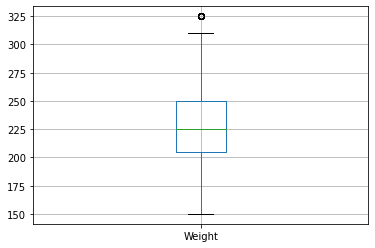

In [25]:
# Boxplot
nba.boxplot(column=['Weight'])

### 4 Información sobre posiciones en el campo y equipos.
#### 4.1 Fusionar las categorias de posición en el campo F,F-C y FC en la categoría genérica Forward. Fusionar las categorias G,G-F y GF en la categoria genérica Guard. Renombrar la categoría ‘PG’ como ‘Point Guard’, ‘SG’ como ‘Shooting Guard’, ‘SF’ como ‘Small Forward’, ‘PF’ como ‘Power Forward’ y ‘C’ como ‘Center’.

In [26]:
nba.Position.value_counts()

G      178
SG     164
C      158
PF     139
F      125
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64

In [27]:
# Lo haremos a través de la función replace, accediendo a través de un dict:
nba = nba.replace({"Position":
                {"G": "Guard", "G-F": "Guard", "GF": "Guard",
                 "F": "Forward", "F-C":"Forward", "FC": "Forward",
                 "PG":"Point Guard", 
                 "SG":"Shooting Guard",
                 "SF": "Small Forward",
                 "PF": "Power Forward",
                 "C": "Center"}})
# si nos pidieran renombrar columnas :nba.rename(columns={'A': 'bla', 'B': 'bla', 'C': 'bla'}
# Verificamos
nba['Position'].unique()

array(['Point Guard', 'Shooting Guard', 'Forward', 'Center',
       'Small Forward', 'Power Forward', 'Guard'], dtype=object)

#### 4.2 ¿En que posición ha sido más veces los jugadores de la semana nombrados?

In [28]:
nba.Position.mode()

0    Guard
dtype: object

#### 4.3 ¿Cuántos equipos distintos hay?

In [29]:
len(nba["Team"].unique())

35

#### 4.4 ¿Cuáles son los cinco equipos que más veces han sido nombrados sus jugadores como jugador de la semana?

In [30]:
(nba.Team.value_counts()).head(5)

Los Angeles Lakers     71
San Antonio Spurs      61
Cleveland Cavaliers    59
Miami Heat             57
Houston Rockets        56
Name: Team, dtype: int64

### 5 Información sobre jugadores. Estadísticos descriptivos.
#### 5.1 Crear una base datos denominada nba.unique en la que no se repita el nombre de ningún jugador.Trabajar a partir de ahora con esta base de datos.

In [31]:
nba_unique = nba.drop_duplicates("Player")

In [32]:
print(nba_unique.shape)
nba_unique.head()


(274, 14)


,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Tiempo
0,29,Na,"Apr 14, 1985",1978,196.0,Micheal Ray Richardson,Point Guard,1984-1985,1985,6,New Jersey Nets,189.0,1.0,7
1,23,Na,"Apr 7, 1985",1982,198.0,Derek Smith,Shooting Guard,1984-1985,1985,2,Los Angeles Clippers,205.0,1.0,3
2,28,Na,"Apr 1, 1985",1979,198.0,Calvin Natt,Forward,1984-1985,1985,5,Denver Nuggets,220.0,1.0,6
3,37,Na,"Mar 24, 1985",1969,218.0,Kareem Abdul-Jabbar,Center,1984-1985,1985,15,Los Angeles Lakers,225.0,1.0,16
4,28,Na,"Mar 17, 1985",1978,206.0,Larry Bird,Small Forward,1984-1985,1985,5,Boston Celtics,220.0,1.0,7


#### 5.2 Listar el nombre de los 10 jugadores más bajos que han sido nombrados alguna vez jugadores de la semana. No debe repetirse ningún nombre.

In [33]:
(nba_unique[['Player','Height']].sort_values(by='Height', ascending = True)).head(10)

,Player,Height
967,Isaiah Thomas,175.0
893,Nate Robinson,175.0
110,Michael Adams,178.0
858,Ty Lawson,180.0
273,Terrell Brandon,180.0
125,Tim Hardaway,183.0
278,Allen Iverson,183.0
219,Kenny Anderson,183.0
251,Elliot Perry,183.0
586,Chris Paul,183.0


#### 5.3 Listar el nombre de los 10 jugadores más altos que han sido nombrados y mostrar su altura. No debe repetirse ningún nombre.

In [34]:
(nba_unique[['Player','Height']].sort_values(by='Height', ascending = False)).head(10)

,Player,Height
486,Yao Ming,229.0
236,Rik Smits,224.0
1139,Kristaps Porzingis,221.0
483,Zydrunas Ilgauskas,221.0
256,Arvydas Sabonis,221.0
3,Kareem Abdul-Jabbar,218.0
188,Dikembe Mutombo,218.0
206,Shaquille O'Neal,216.0
868,Marc Gasol,216.0
115,David Robinson,216.0


### 6 Eliminación de outliers.
#### 6.1 Eliminar los outliers de la variable peso (Weight) y guardar en un data frame nba.avg

<AxesSubplot:>

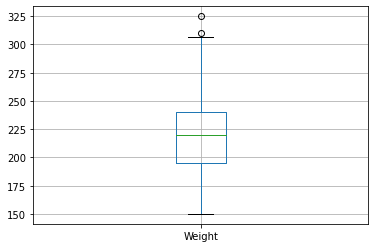

In [35]:
# visualizamos los valores atipicos presentes en la variable peso
nba_unique.boxplot(column=['Weight'])

In [36]:
# Para poder conocer un poco más los datos los ordenaremos por la variable peso
nba_unique.sort_values(['Weight'], ascending=False) 
# Podemos observar que los varlores atípicos serían 310 y 325

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Tiempo
206,20,Na,"Nov 15, 1992",1992,216.0,Shaquille O'Neal,Center,1992-1993,1993,0,Orlando Magic,325.0,1.0,1
486,23,West,"Mar 7, 2004",2002,229.0,Yao Ming,Center,2003-2004,2004,1,Houston Rockets,310.0,0.5,2
878,27,West,"Apr 8, 2013",2008,211.0,Nikola Pekovic,Power Forward,2012-2013,2013,2,Minnesota Timberwolves,307.0,0.5,5
625,22,East,"Mar 4, 2007",2004,208.0,Al Jefferson,Forward,2006-2007,2007,2,Boston Celtics,289.0,0.5,3
726,21,West,"Jan 26, 2009",2005,213.0,Andrew Bynum,Center,2008-2009,2009,3,Los Angeles Lakers,285.0,0.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,23,Na,"Jan 23, 1994",1991,183.0,Kenny Anderson,Point Guard,1993-1994,1994,2,New Jersey Nets,168.0,1.0,3
611,22,East,"Nov 7, 2005",2003,183.0,T.J. Ford,Point Guard,2005-2006,2006,2,Milwaukee Bucks,165.0,0.5,3
278,21,Na,"Apr 13, 1997",1996,183.0,Allen Iverson,Guard,1996-1997,1997,0,Philadelphia Sixers,165.0,1.0,1
110,26,Na,"Dec 11, 1988",1985,178.0,Michael Adams,Point Guard,1988-1989,1989,3,Denver Nuggets,163.0,1.0,4


In [37]:
# Procedemos a eliminar los outliers en la variable Weight
nba_avg = nba_unique[nba_unique['Weight'] < 310]

#### 6.2 Comparar los boxplots de los datos originales en nba.unique y de los datos del peso de nba.avg

<AxesSubplot:>

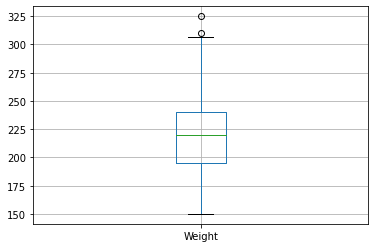

In [38]:
# Comparamos los gráficos "Outliers presentes"
nba_unique.boxplot(column=['Weight'])

<AxesSubplot:>

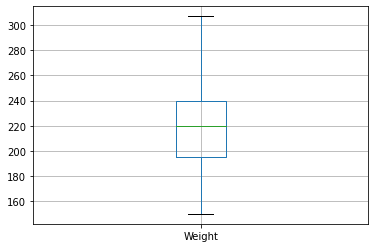

In [39]:
nba_avg.boxplot(column=['Weight'])

#### 6.3 Interpretar los resultados

In [40]:
nba_unique['Weight'].describe()

count    274.000000
mean     219.056934
std       29.407875
min      150.000000
25%      195.000000
50%      220.000000
75%      240.000000
max      325.000000
Name: Weight, dtype: float64

In [41]:
nba_avg['Weight'].describe()

count    272.000000
mean     218.333088
std       28.262059
min      150.000000
25%      195.000000
50%      220.000000
75%      240.000000
max      307.000000
Name: Weight, dtype: float64

 - Podemos apreciar que el número de observaciones se ha reducido en dos pasando de 274 a 272, debido a la eliminación de los valores atípicos.
 - Disminuye un poco la media de 219.05 a 218.33, así como también la desviación típica de 29.40 a 28.26
 - El primer cuartil se mantiene en 195
 - La mediana es de 220
 - El tercer cuartil es de 240
 - El valor máximo cambia debido a que eliminamos aquellos pesos por encima de 310

### 7 Clasificación de jugadores
#### 7.1 Añadir una columna al conjunto de datos denominada “Altura” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende de la altura de cada jugador. Se asigna:
- bajo: los 50 jugadores más bajos
- alto: los 50 jugadores más altos
- normal: el resto de jugadores

In [42]:
# En Primer lugar ordenaremos nuestro dataframe
nba_avg = nba_avg.sort_values(["Height"], ascending=True)

In [46]:
# Almacenamos los valores en la variables indicadas
bajo = nba_avg['Player'][0:50]
alto = nba_avg['Player'][224:274]
normal = nba_avg['Player'][50:224]

In [48]:
# Asignamos los valores a las distintas "categorias" que conformaran la variable "Altura"
nba_avg.loc[nba_avg['Player'].isin(bajo), 'Altura'] = 'bajo'
nba_avg.loc[nba_avg['Player'].isin(normal), 'Altura'] = 'normal'
nba_avg.loc[nba_avg['Player'].isin(alto), 'Altura'] = 'alto'

#### 7.2 Añadir una columna al conjunto de datos denominada “Peso” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende del peso de cada jugador. Se asigna:
- bajo: los 50 jugadores con menor peso
- alto: los 50 jugadores con mayor peso
- normal: el resto de jugadores

In [49]:
# Repetimos el proceso,ordenaremos nuestro dataframe
nba_avg = nba_avg.sort_values(["Weight"], ascending=True)
# Almacenamos los valores en la variables indicadas
bajo = nba_avg['Player'][0:50]
alto = nba_avg['Player'][224:274]
normal = nba_avg['Player'][50:224]
# Asignamos los valores a las distintas "categorias" que conformaran la variable "Peso
nba_avg.loc[nba_avg['Player'].isin(bajo), 'Peso']='bajo'
nba_avg.loc[nba_avg['Player'].isin(normal), 'Peso']='normal'
nba_avg.loc[nba_avg['Player'].isin(alto), 'Peso'] = 'alto'

In [52]:
nba_avg.columns

Index(['Age', 'Conference', 'Date', 'Draft Year', 'Height', 'Player',
       'Position', 'Season', 'Season short', 'Seasons in league', 'Team',
       'Weight', 'Real_value', 'Tiempo', 'Altura', 'Peso'],
      dtype='object')

In [53]:
nba_avg.head(10)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Tiempo,Altura,Peso
251,25,Na,"Nov 20, 1994",1991,183.0,Elliot Perry,Point Guard,1994-1995,1995,3,Phoenix Suns,150.0,1.0,4,bajo,bajo
110,26,Na,"Dec 11, 1988",1985,178.0,Michael Adams,Point Guard,1988-1989,1989,3,Denver Nuggets,163.0,1.0,4,bajo,bajo
278,21,Na,"Apr 13, 1997",1996,183.0,Allen Iverson,Guard,1996-1997,1997,0,Philadelphia Sixers,165.0,1.0,1,bajo,bajo
611,22,East,"Nov 7, 2005",2003,183.0,T.J. Ford,Point Guard,2005-2006,2006,2,Milwaukee Bucks,165.0,0.5,3,bajo,bajo
219,23,Na,"Jan 23, 1994",1991,183.0,Kenny Anderson,Point Guard,1993-1994,1994,2,New Jersey Nets,168.0,1.0,3,bajo,bajo
78,25,Na,"Feb 21, 1988",1984,185.0,John Stockton,Point Guard,1987-1988,1988,3,Utah Jazz,170.0,1.0,4,bajo,bajo
56,26,Na,"Feb 1, 1987",1982,190.0,Fat Lever,Point Guard,1986-1987,1987,4,Denver Nuggets,170.0,1.0,5,normal,bajo
791,20,East,"Nov 16, 2009",2009,185.0,Brandon Jennings,Guard,2009-2010,2010,0,Milwaukee Bucks,170.0,0.5,1,bajo,bajo
143,25,Na,"Mar 17, 1991",1987,190.0,Kenny Smith,Point Guard,1990-1991,1991,3,Houston Rockets,170.0,1.0,4,bajo,bajo
329,30,Na,"Mar 28, 1999",1991,183.0,Darrell Armstrong,Point Guard,1998-1999,1999,4,Orlando Magic,170.0,1.0,8,bajo,bajo


#### 7.3 Calcular la media y desviación típica del peso (Weight) según la clasificación de altura de los jugadores.

In [56]:
nba_avg[['Peso','Weight']].groupby('Peso').agg(['mean','std'])

Weight           
              mean        std
Peso                         
alto    260.358333  12.771108
bajo    179.760000   8.579901
normal  217.824138  16.301654

#### 7.4 Realizar un boxplot del peso (Weight) según la clasificación de altura del jugador. Los boxplots deben estar ordenados de menos a mayor altura.

<AxesSubplot:xlabel='Altura', ylabel='Weight'>

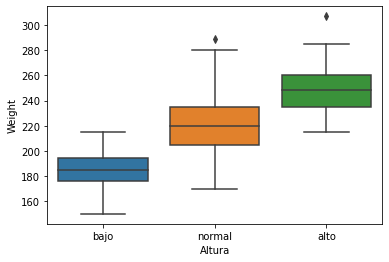

In [59]:
import seaborn as sns
sns.boxplot(x =nba_avg["Altura"], y = nba_avg["Weight"])

#### 7.5 Hacer un listado con el nombre de jugadores que tienen una altura ‘normal’ y un peso ‘alto’. Ordenar alfabéticamente por nombre.

In [61]:
Listado = nba_avg[(nba_avg['Altura'] == 'normal') & (nba_avg['Peso'] == 'alto')].sort_values(['Player'])
Listado.head(5)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Tiempo,Altura,Peso
625,22,East,"Mar 4, 2007",2004,208.0,Al Jefferson,Forward,2006-2007,2007,2,Boston Celtics,289.0,0.5,3,normal,alto
976,21,West,"Mar 16, 2015",2012,208.0,Anthony Davis,Power Forward,2014-2015,2015,2,New Orleans Pelicans,253.0,0.5,3,normal,alto
450,26,East,"Jan 19, 2003",1996,206.0,Antoine Walker,Forward,2002-2003,2003,6,Boston Celtics,265.0,0.5,7,normal,alto
910,23,West,"Dec 10, 2012",2009,208.0,Blake Griffin,Power Forward,2012-2013,2013,3,Los Angeles Clippers,251.0,0.5,4,normal,alto
495,22,East,"Jan 25, 2004",2002,206.0,Carlos Boozer,Power Forward,2003-2004,2004,1,Cleveland Cavaliers,266.0,0.5,2,normal,alto
